In [3]:
#Importing the necessary libraries
import platform
print("Python version:", platform.python_version())

import sys
import os

import tensorflow as tf
print("tensorflow version:",tf.__version__)

import numpy as np
print("numpy version:",np.__version__)

import cv2
print("cv2 version:",cv2.__version__)

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
print("matplotlib version:",matplotlib.__version__)

import pandas as pd
print("pandas version:",pd.__version__)

from skimage.transform import resize

from tensorflow.keras import datasets, layers, models

Python version: 3.8.19


ModuleNotFoundError: No module named 'tensorflow'

In [4]:
# Check for GPU availability
tf.config.list_physical_devices()

NameError: name 'tf' is not defined

### Data Preparation

In [3]:
#Function to change the path format
def path_correct(path):
  path = '/'.join(path[2:].split('\\'))
  path = os.path.join(path_ds, path)
  return path


#Loading the training data for damage images
#Access the csv file containing the absolute directory paths to each file
path_ds = os.path.join('./','Tokaido_dataset') #put a path to the dataset
col_names = ['image file name', 'component label file name', 'damage label file name', 'depth image file name',
             'camera focal length in mm', 'regular images', 'images containing damage in the RRDR']
ftrain = pd.read_csv(os.path.join(path_ds,'files_train.csv'),names = col_names,delimiter=',')
ftrain.iloc[:,0] = ftrain.iloc[:,0].apply(lambda x: path_correct(x))
ftrain.iloc[:,1] = ftrain.iloc[:,1].apply(lambda x: path_correct(x))
ftrain.iloc[:,2] = ftrain.iloc[:,2].apply(lambda x: path_correct(x))
ftrain.iloc[:,3] = ftrain.iloc[:,3].apply(lambda x: path_correct(x))
train_comp = ftrain.loc[ftrain['regular images']==True, ['image file name', 'component label file name', 'damage label file name', 'depth image file name', 'camera focal length in mm']]
train_dmg = ftrain.loc[ftrain['images containing damage in the RRDR']==True, ['image file name', 'component label file name', 'damage label file name', 'depth image file name', 'camera focal length in mm']]


In [4]:
print(len(train_dmg))
train_dmg

4381


,image file name,component label file name,damage label file name,depth image file name,camera focal length in mm
0,./Tokaido_dataset\img_syn_raw/train/image_case...,./Tokaido_dataset\synthetic/train/labcmp/image...,./Tokaido_dataset\synthetic/train/labdmg/image...,./Tokaido_dataset\synthetic/train/depth/image_...,43.375470
3,./Tokaido_dataset\img_syn_raw/train/image_case...,./Tokaido_dataset\synthetic/train/labcmp/image...,./Tokaido_dataset\synthetic/train/labdmg/image...,./Tokaido_dataset\synthetic/train/depth/image_...,43.242723
5,./Tokaido_dataset\img_syn_raw/train/image_case...,./Tokaido_dataset\synthetic/train/labcmp/image...,./Tokaido_dataset\synthetic/train/labdmg/image...,./Tokaido_dataset\synthetic/train/depth/image_...,20.921244
7,./Tokaido_dataset\img_syn_raw/train/image_case...,./Tokaido_dataset\synthetic/train/labcmp/image...,./Tokaido_dataset\synthetic/train/labdmg/image...,./Tokaido_dataset\synthetic/train/depth/image_...,46.639972
11,./Tokaido_dataset\img_syn_raw/train/image_case...,./Tokaido_dataset\synthetic/train/labcmp/image...,./Tokaido_dataset\synthetic/train/labdmg/image...,./Tokaido_dataset\synthetic/train/depth/image_...,53.623157
...,...,...,...,...,...
13941,./Tokaido_dataset\img_syn_raw/train/image_case...,./Tokaido_dataset\synthetic/train/labcmp/image...,./Tokaido_dataset\synthetic/train/labdmg/image...,./Tokaido_dataset\synthetic/train/depth/image_...,51.725212
13942,./Tokaido_dataset\img_syn_raw/train/image_case...,./Tokaido_dataset\synthetic/train/labcmp/image...,./Tokaido_dataset\synthetic/train/labdmg/image...,./Tokaido_dataset\synthetic/train/depth/image_...,53.422408
13945,./Tokaido_dataset\img_syn_raw/train/image_case...,./Tokaido_dataset\synthetic/train/labcmp/image...,./Tokaido_dataset\synthetic/train/labdmg/image...,./Tokaido_dataset\synthetic/train/depth/image_...,41.561651
13949,./Tokaido_dataset\img_syn_raw/train/image_case...,./Tokaido_dataset\synthetic/train/labcmp/image...,./Tokaido_dataset\synthetic/train/labdmg/image...,./Tokaido_dataset\synthetic/train/depth/image_...,36.669088


image file name                         ./Tokaido_dataset\img_syn_raw/train/image_case...
component label file name               ./Tokaido_dataset\synthetic/train/labcmp/image...
damage label file name                  ./Tokaido_dataset\synthetic/train/labdmg/image...
depth image file name                   ./Tokaido_dataset\synthetic/train/depth/image_...
camera focal length in mm                                                       43.242723
regular images                                                                       True
images containing damage in the RRDR                                                 True
Name: 3, dtype: object
(1080, 1920, 3)
<class 'numpy.ndarray'>


C:\Users\REP_SIF_2\AppData\Local\Temp\ipykernel_29764\731981023.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = mpimg.imread(ftrain.iloc[3][0])


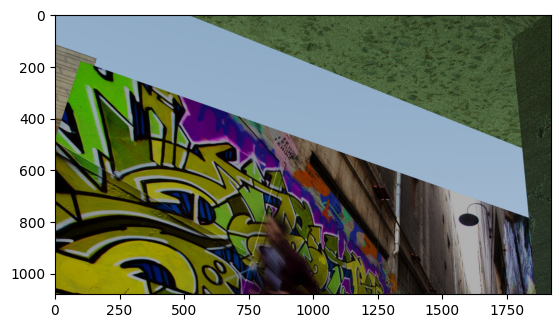

In [5]:
#Printing the training image

#image
print(ftrain.iloc[3])
image = mpimg.imread(ftrain.iloc[3][0])
print(image.shape)
print(type(image))
plt.imshow(image)


image file name                         ./Tokaido_dataset\img_syn_raw/train/image_case...
component label file name               ./Tokaido_dataset\synthetic/train/labcmp/image...
damage label file name                  ./Tokaido_dataset\synthetic/train/labdmg/image...
depth image file name                   ./Tokaido_dataset\synthetic/train/depth/image_...
camera focal length in mm                                                       43.242723
regular images                                                                       True
images containing damage in the RRDR                                                 True
Name: 3, dtype: object
(360, 640)
<class 'numpy.ndarray'>


C:\Users\REP_SIF_2\AppData\Local\Temp\ipykernel_29764\3998249144.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = mpimg.imread(ftrain.iloc[3][2])#[x][y] x = row no. & y = {0:raw image, 1:component label, 2:damage label, 3:depth label}


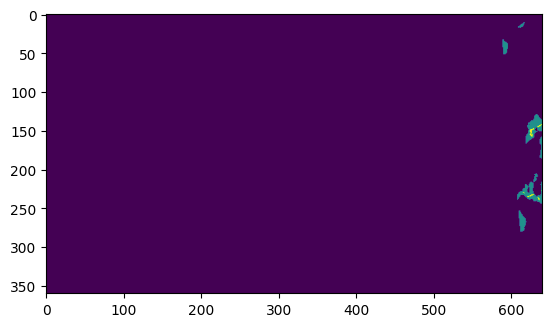

In [6]:
#label
#Printing the above image label
print(ftrain.iloc[3])
image = mpimg.imread(ftrain.iloc[3][2])#[x][y] x = row no. & y = {0:raw image, 1:component label, 2:damage label, 3:depth label}
print(image.shape)
print(type(image))
plt.imshow(image)

In [7]:
#Run for training on the damage images
train1 = train_dmg[:4000]
val1 = train_dmg[4000:]

image file name           ./Tokaido_dataset\images_puretex/im820_Concret...
damage label file name    ./Tokaido_dataset\synthetic_puretex/labdmg/im8...
Name: 0, dtype: object


C:\Users\REP_SIF_2\AppData\Local\Temp\ipykernel_29764\2104783165.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = mpimg.imread(ftrain.iloc[0][1])


(360, 640)
<class 'numpy.ndarray'>


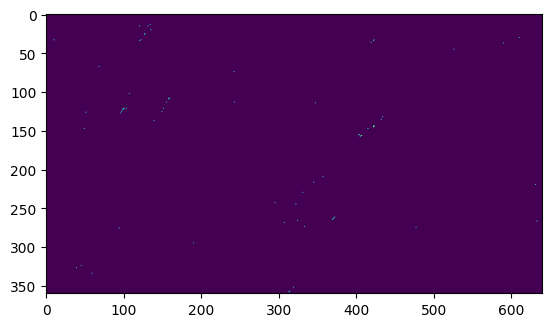

In [8]:
#Loading the training data from the pure_tex file

#Access the csv file containing the absolute directory paths to each file
D:\\MTP\\Tokaidos\\log_file_weighted.log #put a path to the dataset
col_names = ['image file name', 'damage label file name']

ftrain = pd.read_csv(os.path.join(path_ds,'files_puretex_train.csv'),names = col_names,delimiter=',')
ftrain.iloc[:,0] = ftrain.iloc[:,0].apply(lambda x: path_correct(x))
ftrain.iloc[:,1] = ftrain.iloc[:,1].apply(lambda x: path_correct(x))

train_tex = ftrain

#Printing the training image
print(ftrain.iloc[0])
image = mpimg.imread(ftrain.iloc[0][1])
print(image.shape)
print(type(image))
plt.imshow(image)

In [9]:
print(len(train_tex))
train_tex

2700


,image file name,damage label file name
0,./Tokaido_dataset\images_puretex/im820_Concret...,./Tokaido_dataset\synthetic_puretex/labdmg/im8...
1,./Tokaido_dataset\images_puretex/im418_Concret...,./Tokaido_dataset\synthetic_puretex/labdmg/im4...
2,./Tokaido_dataset\images_puretex/im704_Concret...,./Tokaido_dataset\synthetic_puretex/labdmg/im7...
3,./Tokaido_dataset\images_puretex/im2589_Concre...,./Tokaido_dataset\synthetic_puretex/labdmg/im2...
4,./Tokaido_dataset\images_puretex/im962_Concret...,./Tokaido_dataset\synthetic_puretex/labdmg/im9...
...,...,...
2695,./Tokaido_dataset\images_puretex/im763_Concret...,./Tokaido_dataset\synthetic_puretex/labdmg/im7...
2696,./Tokaido_dataset\images_puretex/im835_Concret...,./Tokaido_dataset\synthetic_puretex/labdmg/im8...
2697,./Tokaido_dataset\images_puretex/im1653_Concre...,./Tokaido_dataset\synthetic_puretex/labdmg/im1...
2698,./Tokaido_dataset\images_puretex/im2607_Concre...,./Tokaido_dataset\synthetic_puretex/labdmg/im2...


In [10]:
# Append the first 2300 rows from 'train_tex' to 'train1'
train1 = pd.concat([train1, train_tex[:2300]])

# Append the remaining rows from 'train_tex' to 'val1'
val1 = pd.concat([val1, train_tex[2300:]])

### Data Preprocessing

In [11]:
def get_label(file_path):
    #img = tf.io.read_file(file_path)
    #mask = file_path
    mask = np.squeeze(file_path, axis = 2)
    target_array = np.zeros((mask.shape[0],mask.shape[1],3))
    target_array[:,:,0]=np.where(mask == 1, 1, 0)
    target_array[:,:,1]=np.where(mask == 2, 1, 0)
    target_array[:,:,2]=np.where(mask == 3, 1, 0)

    return target_array

def show_img(image):
  #image = np.squeeze(image, axis = -1)
  plt.figure()
  plt.imshow(image)
  plt.axis('off')

def show_label(label):
  fig, axes = plt.subplots(1, 3, figsize=(16, 112))
  y1 = label[:,:,0]
  y2 = label[:,:,1]
  y3 = label[:,:,2]
  plt.axis('off')
  axes[0].imshow(y1)
  axes[1].imshow(y2)
  axes[2].imshow(y3)

# Function to print the prediction images
def show_pred(y, threshold=0.5):
  # y = (y > threshold)
  fig, axes = plt.subplots(1, 3, figsize=(16, 112))
  y1 = y[:,:,0]
  y2 = y[:,:,1]
  y3 = y[:,:,2]
  plt.axis('off')
  axes[0].imshow(y1)
  axes[1].imshow(y2)
  axes[2].imshow(y3)


def normalize(input_image):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  return input_image

def image_augmentation(img):
  seed = (2,3)
  img = tf.image.stateless_random_flip_left_right(img, seed)
  return img

def label_augmentation(img):
  seed = (2,3)
  img = tf.image.stateless_random_flip_left_right(img, seed)
  return img

In [12]:
def preprocess(x, y):
    def f(x, y):
        x = tf.io.read_file(x)
        y = tf.io.read_file(y)
        x = tf.io.decode_png(x, channels = 3)
        x = tf.image.resize_with_pad(x, 256, 256)
        x = tf.numpy_function(normalize, [x], [tf.float32])
        y = tf.io.decode_png(y, channels = 0)
        y = tf.numpy_function(get_label, [y], [tf.float32])
        y = tf.image.resize_with_pad(y, 256, 256)
        x = tf.numpy_function(image_augmentation, [x], [tf.float32])
        y = tf.numpy_function(label_augmentation, [y], [tf.float32])

        return x, y

    images, masks = tf.numpy_function(f, [x, y], [tf.float32, tf.float32])
    images.set_shape([256, 256, 3])
    masks.set_shape([256, 256, 3])

    return images, masks

In [13]:
# Extract image and mask file paths from the CSV file
train_image_paths = train1['image file name'].values
train_mask_paths = train1['damage label file name'].values

val_image_paths = val1['image file name'].values
val_mask_paths = val1['damage label file name'].values

In [14]:
# Create training and validation datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_mask_paths))
val_dataset = tf.data.Dataset.from_tensor_slices((val_image_paths, val_mask_paths))

# Apply the preprocess function to load and preprocess images and masks
train_dataset = train_dataset.map(preprocess)
val_dataset = val_dataset.map(preprocess)

# batch, and prefetch the datasets
train_batch_size = 1
val_batch_size = 1

train_dataset = train_dataset.batch(train_batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(val_batch_size).prefetch(tf.data.AUTOTUNE)

In [15]:
len(train_dataset)

6300

In [16]:
len(val_dataset)

781

(256, 256, 3)
(256, 256, 3)


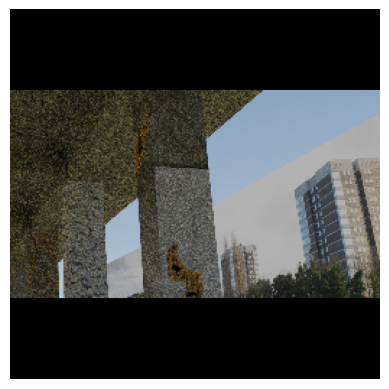

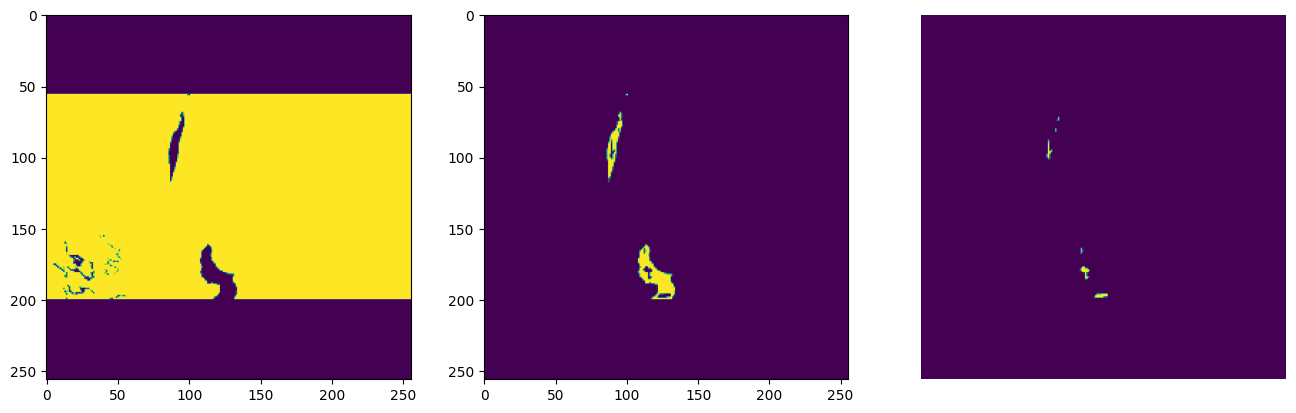

In [17]:
for batch in val_dataset:
        x, y = batch
        show_img(x[0])
        print(x[0].shape)
        show_label(y[0])
        print(y[0].shape)

        break

### model

In [18]:


"""
Utility functions for Unet3+ models
"""
import tensorflow as tf
import tensorflow.keras as k


def conv_block(x, kernels, kernel_size=(3, 3), strides=(1, 1), padding='same',
               is_bn=True, is_relu=True, n=2):
    """ Custom function for conv2d:
        Apply  3*3 convolutions with BN and relu.
    """
    for i in range(1, n + 1):
        x = k.layers.Conv2D(filters=kernels, kernel_size=kernel_size,
                            padding=padding, strides=strides,
                            kernel_regularizer=tf.keras.regularizers.l2(1e-4),
                            kernel_initializer=k.initializers.he_normal(seed=5))(x)
        if is_bn:
            x = k.layers.BatchNormalization()(x)
        if is_relu:
            x = k.activations.relu(x)

    return x


def dot_product(seg, cls):
    b, h, w, n = k.backend.int_shape(seg)
    seg = tf.reshape(seg, [-1, h * w, n])
    final = tf.einsum("ijk,ik->ijk", seg, cls)
    final = tf.reshape(final, [-1, h, w, n])
    return final


"""
UNet3+ base model
"""
import tensorflow as tf
import tensorflow.keras as k

def unet3plus(input_shape, output_channels):
    """ UNet3+ base model """
    filters = [64, 128, 256, 512, 1024]

    input_layer = k.layers.Input(
        shape=input_shape,
        name="input_layer"
    )  # 320*320*3

    """ Encoder"""
    # block 1
    e1 = conv_block(input_layer, filters[0])  # 320*320*64

    # block 2
    e2 = k.layers.MaxPool2D(pool_size=(2, 2))(e1)  # 160*160*64
    e2 = conv_block(e2, filters[1])  # 160*160*128

    # block 3
    e3 = k.layers.MaxPool2D(pool_size=(2, 2))(e2)  # 80*80*128
    e3 = conv_block(e3, filters[2])  # 80*80*256

    # block 4
    e4 = k.layers.MaxPool2D(pool_size=(2, 2))(e3)  # 40*40*256
    e4 = conv_block(e4, filters[3])  # 40*40*512

    # block 5
    # bottleneck layer
    e5 = k.layers.MaxPool2D(pool_size=(2, 2))(e4)  # 20*20*512
    e5 = conv_block(e5, filters[4])  # 20*20*1024

    """ Decoder """
    cat_channels = filters[0]
    cat_blocks = len(filters)
    upsample_channels = cat_blocks * cat_channels

    """ d4 """
    e1_d4 = k.layers.MaxPool2D(pool_size=(8, 8))(e1)  # 320*320*64  --> 40*40*64
    e1_d4 = conv_block(e1_d4, cat_channels, n=1)  # 320*320*64  --> 40*40*64

    e2_d4 = k.layers.MaxPool2D(pool_size=(4, 4))(e2)  # 160*160*128 --> 40*40*128
    e2_d4 = conv_block(e2_d4, cat_channels, n=1)  # 160*160*128 --> 40*40*64

    e3_d4 = k.layers.MaxPool2D(pool_size=(2, 2))(e3)  # 80*80*256  --> 40*40*256
    e3_d4 = conv_block(e3_d4, cat_channels, n=1)  # 80*80*256  --> 40*40*64

    e4_d4 = conv_block(e4, cat_channels, n=1)  # 40*40*512  --> 40*40*64

    e5_d4 = k.layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(e5)  # 80*80*256  --> 40*40*256
    e5_d4 = conv_block(e5_d4, cat_channels, n=1)  # 20*20*1024  --> 20*20*64

    d4 = k.layers.concatenate([e1_d4, e2_d4, e3_d4, e4_d4, e5_d4])
    d4 = conv_block(d4, upsample_channels, n=1)  # 40*40*320  --> 40*40*320

    """ d3 """
    e1_d3 = k.layers.MaxPool2D(pool_size=(4, 4))(e1)  # 320*320*64 --> 80*80*64
    e1_d3 = conv_block(e1_d3, cat_channels, n=1)  # 80*80*64 --> 80*80*64

    e2_d3 = k.layers.MaxPool2D(pool_size=(2, 2))(e2)  # 160*160*256 --> 80*80*256
    e2_d3 = conv_block(e2_d3, cat_channels, n=1)  # 80*80*256 --> 80*80*64

    e3_d3 = conv_block(e3, cat_channels, n=1)  # 80*80*512 --> 80*80*64

    e4_d3 = k.layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(d4)  # 40*40*320 --> 80*80*320
    e4_d3 = conv_block(e4_d3, cat_channels, n=1)  # 80*80*320 --> 80*80*64

    e5_d3 = k.layers.UpSampling2D(size=(4, 4), interpolation='bilinear')(e5)  # 20*20*320 --> 80*80*320
    e5_d3 = conv_block(e5_d3, cat_channels, n=1)  # 80*80*320 --> 80*80*64

    d3 = k.layers.concatenate([e1_d3, e2_d3, e3_d3, e4_d3, e5_d3])
    d3 = conv_block(d3, upsample_channels, n=1)  # 80*80*320 --> 80*80*320

    """ d2 """
    e1_d2 = k.layers.MaxPool2D(pool_size=(2, 2))(e1)  # 320*320*64 --> 160*160*64
    e1_d2 = conv_block(e1_d2, cat_channels, n=1)  # 160*160*64 --> 160*160*64

    e2_d2 = conv_block(e2, cat_channels, n=1)  # 160*160*256 --> 160*160*64

    d3_d2 = k.layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(d3)  # 80*80*320 --> 160*160*320
    d3_d2 = conv_block(d3_d2, cat_channels, n=1)  # 160*160*320 --> 160*160*64

    d4_d2 = k.layers.UpSampling2D(size=(4, 4), interpolation='bilinear')(d4)  # 40*40*320 --> 160*160*320
    d4_d2 = conv_block(d4_d2, cat_channels, n=1)  # 160*160*320 --> 160*160*64

    e5_d2 = k.layers.UpSampling2D(size=(8, 8), interpolation='bilinear')(e5)  # 20*20*320 --> 160*160*320
    e5_d2 = conv_block(e5_d2, cat_channels, n=1)  # 160*160*320 --> 160*160*64

    d2 = k.layers.concatenate([e1_d2, e2_d2, d3_d2, d4_d2, e5_d2])
    d2 = conv_block(d2, upsample_channels, n=1)  # 160*160*320 --> 160*160*320

    """ d1 """
    e1_d1 = conv_block(e1, cat_channels, n=1)  # 320*320*64 --> 320*320*64

    d2_d1 = k.layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(d2)  # 160*160*320 --> 320*320*320
    d2_d1 = conv_block(d2_d1, cat_channels, n=1)  # 160*160*320 --> 160*160*64

    d3_d1 = k.layers.UpSampling2D(size=(4, 4), interpolation='bilinear')(d3)  # 80*80*320 --> 320*320*320
    d3_d1 = conv_block(d3_d1, cat_channels, n=1)  # 320*320*320 --> 320*320*64

    d4_d1 = k.layers.UpSampling2D(size=(8, 8), interpolation='bilinear')(d4)  # 40*40*320 --> 320*320*320
    d4_d1 = conv_block(d4_d1, cat_channels, n=1)  # 320*320*320 --> 320*320*64

    e5_d1 = k.layers.UpSampling2D(size=(16, 16), interpolation='bilinear')(e5)  # 20*20*320 --> 320*320*320
    e5_d1 = conv_block(e5_d1, cat_channels, n=1)  # 320*320*320 --> 320*320*64

    d1 = k.layers.concatenate([e1_d1, d2_d1, d3_d1, d4_d1, e5_d1, ])
    d1 = conv_block(d1, upsample_channels, n=1)  # 320*320*320 --> 320*320*320

    # last layer does not have batchnorm and relu
    d = conv_block(d1, output_channels, n=1, is_bn=False, is_relu=False)

    output = k.activations.sigmoid(d)

    return tf.keras.Model(inputs=input_layer, outputs=[output], name='UNet_3Plus')

In [19]:
INPUT_SHAPE = [256, 256, 3]
OUTPUT_CHANNELS = 3

generator = unet3plus(INPUT_SHAPE, OUTPUT_CHANNELS)
generator.summary()

Model: "UNet_3Plus"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_layer[0][0]']            
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                        

In [20]:

# class Dis(tf.keras.Model):
#     """
#     Discriminator Network for the Adversarial Training.
#     """
#     def __init__(self, in_channels, negative_slope=0.2):
#         super(Dis, self).__init__()
#         self._in_channels = in_channels
#         self._negative_slope = negative_slope

#         self.conv1 = tf.keras.layers.Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=(None, None, self._in_channels))
#         self.relu1 = tf.keras.layers.LeakyReLU(alpha=self._negative_slope)
#         self.conv2 = tf.keras.layers.Conv2D(128, kernel_size=4, strides=2, padding='same')
#         self.relu2 = tf.keras.layers.LeakyReLU(alpha=self._negative_slope)
#         self.conv3 = tf.keras.layers.Conv2D(256, kernel_size=4, strides=2, padding='same')
#         self.relu3 = tf.keras.layers.LeakyReLU(alpha=self._negative_slope)
#         self.conv4 = tf.keras.layers.Conv2D(512, kernel_size=4, strides=2, padding='same')
#         self.relu4 = tf.keras.layers.LeakyReLU(alpha=self._negative_slope)
#         self.conv5 = tf.keras.layers.Conv2D(1, kernel_size=4, strides=2, padding='same')

#     def call(self, x):
#         x = self.conv1(x)  # -,-,161,161
#         x = self.relu1(x)
#         x = self.conv2(x)  # -,-,81,81
#         x = self.relu2(x)
#         x = self.conv3(x)  # -,-,41,41
#         x = self.relu3(x)
#         x = self.conv4(x)  # -,-,21,21
#         x = self.relu4(x)
#         x = self.conv5(x)  # -,-,11,11

#         # Upsample
#         x = tf.keras.layers.UpSampling2D()(x)  # -,-,22,22
#         x = x[:, :-1, :-1, :]  # -,-,21,21

#         x = tf.keras.layers.UpSampling2D()(x)  # -,-,42,42
#         x = x[:, :-1, :-1, :]  # -,-,41,41

#         x = tf.keras.layers.UpSampling2D()(x)  # -,-,82,82
#         x = x[:, :-1, :-1, :]  # -,-,81,81

#         x = tf.keras.layers.UpSampling2D()(x)  # -,-,162,162
#         x = x[:, :-1, :-1, :]  # -,-,161,161

#         x = tf.keras.layers.UpSampling2D()(x)  # -,-,322,322
#         x = x[:, :-1, :-1, :]  # -,-,321,321

#         return x
class Dis(tf.keras.Model):
    def __init__(self, in_channels, negative_slope=0.2):
        super(Dis, self).__init__()
        self._in_channels = in_channels
        self._negative_slope = negative_slope

        # Convolutional layers
        self.conv1 = tf.keras.layers.Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=(None, None, self._in_channels))
        self.relu1 = tf.keras.layers.LeakyReLU(alpha=self._negative_slope)
        
        self.conv2 = tf.keras.layers.Conv2D(128, kernel_size=4, strides=2, padding='same')
        self.relu2 = tf.keras.layers.LeakyReLU(alpha=self._negative_slope)
        
        self.conv3 = tf.keras.layers.Conv2D(256, kernel_size=4, strides=2, padding='same')
        self.relu3 = tf.keras.layers.LeakyReLU(alpha=self._negative_slope)
        
        self.conv4 = tf.keras.layers.Conv2D(512, kernel_size=4, strides=2, padding='same')
        self.relu4 = tf.keras.layers.LeakyReLU(alpha=self._negative_slope)
        
        self.conv5 = tf.keras.layers.Conv2D(1, kernel_size=4, strides=2, padding='same')

    def call(self, x):
        # Forward pass
        x = self.conv1(x)  
        x = self.relu1(x)
        
        x = self.conv2(x)  
        x = self.relu2(x)
        
        x = self.conv3(x)  
        x = self.relu3(x)
        
        x = self.conv4(x)  
        x = self.relu4(x)
        a
        x = self.conv5(x)
        

        # Upsampling
        x = tf.keras.layers.UpSampling2D()(x)  
        x = tf.keras.layers.UpSampling2D()(x)  
        x = tf.keras.layers.UpSampling2D()(x)  
        x = tf.keras.layers.UpSampling2D()(x)  
        x = tf.keras.layers.UpSampling2D()(x) 

        x = k.activations.sigmoid(x) 

        return x



In [21]:

discriminator = Dis(3)

In [22]:
LAMBDA = 100

In [23]:
loss_object = tf.keras.losses.BinaryCrossentropy()

In [24]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

In [25]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

### Training

In [26]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  show_img(test_input[0])
  show_label(tar[0])
  show_pred(prediction[0])
  plt.show()

In [27]:
from tensorflow.python.client import device_lib
device = ""

for i in device_lib.list_local_devices():
  if i.name == '/device:GPU:0':
    device = '/device:GPU:0'
    break
  elif i.name == '/device:XLA_GPU:0':
    device = '/device:XLA_GPU:0'


In [28]:
@tf.function
def train_step(input_image, target, gen_optimizer, disc_optimizer):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    # disc_real_output = discriminator(input_image, target, training=True)
    # disc_generated_output = discriminator(input_image, gen_output, training=True)
    disc_real_output = discriminator(target)
    disc_generated_output = discriminator(gen_output)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  gen_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  disc_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))
  
  return gen_gan_loss, gen_l1_loss, gen_total_loss, disc_loss

In [29]:
import time
from IPython.display import clear_output
from tqdm import tqdm


# Lists to store losses
gen_total_losses = []
gen_gan_losses = []
gen_l1_losses = []
disc_losses = []


def lr_scheduler(epoch, current_lr):
    if epoch % 10 == 0 and epoch != 0:
        new_lr = current_lr * 0.1  # Reduce the learning rate by half every 10 epochs
        print(f'Learning rate adjusted at epoch {epoch}: New LR = {new_lr}')
        return new_lr
    else:
        return current_lr
    

def fit(train_ds, test_ds, epochs):
  example_input, example_target = next(iter(test_ds.take(1)))

  # Initialize variables to track losses
  prev_gen_total_loss = float('inf')
#   prev_disc_total_loss = float('inf')
# Initialize the optimizer
  initial_learning_rate = 1e-5
  gen_optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
  disc_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

  # Define checkpoint
  checkpoint_dir = './training_checkpoints_soft'
  checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
  checkpoint = tf.train.Checkpoint(generator_optimizer=gen_optimizer,
                                 discriminator_optimizer=disc_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
  
  checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
  
  for epoch in range(epochs):
    avg_gen_loss = 0
    avg_gen_gan_loss = 0
    avg_gen_l1_loss = 0
    avg_disc_loss = 0

    print(f"Epoch {epoch + 1}/{epochs}")
    start = time.time()

    # Initialize tqdm progress bar
    pbar = tqdm(train_ds, desc=f'Epoch {epoch + 1}/{epochs}', unit='batch')

    # Set optimizer learning rate
    gen_optimizer.learning_rate = lr_scheduler(epoch+1, gen_optimizer.learning_rate)
    disc_optimizer.learning_rate = lr_scheduler(epoch+1, disc_optimizer.learning_rate)
    
    for input_image, target in pbar:
        gen_gan_loss, gen_l1_loss, gen_total_loss, disc_loss = train_step(input_image, target, gen_optimizer, disc_optimizer)
    
        avg_gen_loss += gen_total_loss
        avg_gen_gan_loss += gen_gan_loss
        avg_gen_l1_loss += gen_l1_loss
        avg_disc_loss += disc_loss
        # Update progress bar description
        pbar.set_description(f'Epoch {epoch + 1}/{epochs}: gen_loss: {gen_total_loss:.4f}, gen_gan_loss: {gen_gan_loss:.4f}, gen_l1_loss: {gen_l1_loss:.4f}, disc_loss: {disc_loss:.4f}')
    
    avg_gen_gan_loss = avg_gen_gan_loss/len(train_ds)
    avg_gen_loss = avg_gen_loss/len(train_ds)
    avg_gen_l1_loss = avg_gen_l1_loss/len(train_ds)
    avg_disc_loss = avg_disc_loss/len(train_ds)
    print(f'Best Gen Loss: {prev_gen_total_loss}')
    print(f'Epoch {epoch + 1}/{epochs}: avg_gen_loss: {avg_gen_loss:.4f}, avg_gen_gan_loss: {avg_gen_gan_loss:.4f}, avg_gen_l1_loss: {avg_gen_l1_loss:.4f}, avg_disc_loss: {avg_disc_loss:.4f}')

    pbar.close()  # Close tqdm progress bar after each epoch

    # Save the model if both losses decreased
    if avg_gen_loss < prev_gen_total_loss:
        checkpoint.save(file_prefix=checkpoint_prefix)
        print("Model Saved Successfully!!")
        prev_gen_total_loss = avg_gen_loss
        # prev_disc_total_loss = disc_loss

    # Save the losses
    gen_total_losses.append(avg_gen_loss)
    gen_gan_losses.append(avg_gen_gan_loss)
    gen_l1_losses.append(avg_gen_l1_loss)
    disc_losses.append(avg_disc_loss)

    # Save the model after every 10 epochs
    if (epoch + 1) % 15 == 0:
        clear_output(wait=True)

    # Generate and display images after each epoch
    generate_images(generator, example_input, example_target)
        
    print(f'Time taken for epoch {epoch + 1}: {time.time() - start:.2f} sec\n')

  checkpoint.save(file_prefix=checkpoint_prefix)
  print("Training Complete")



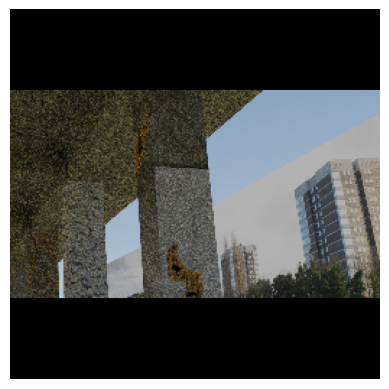

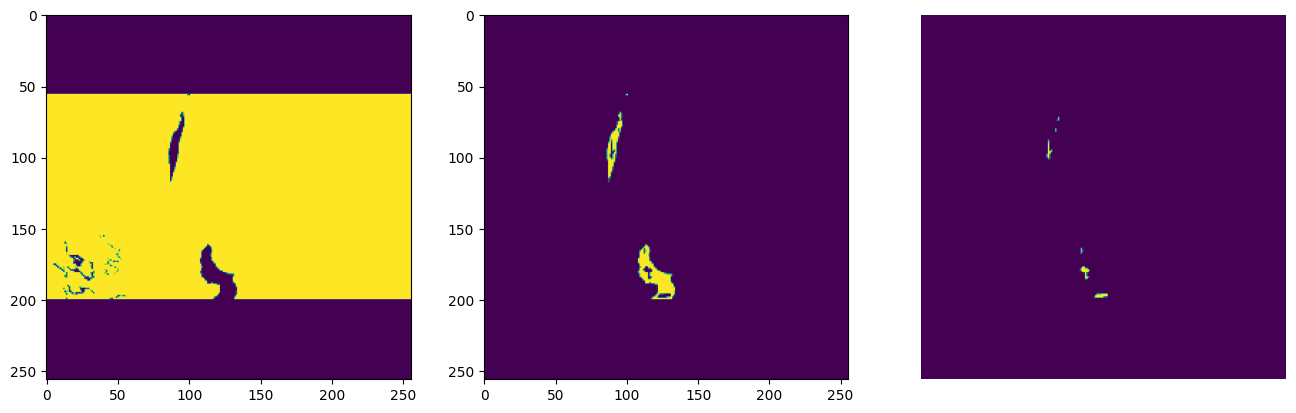

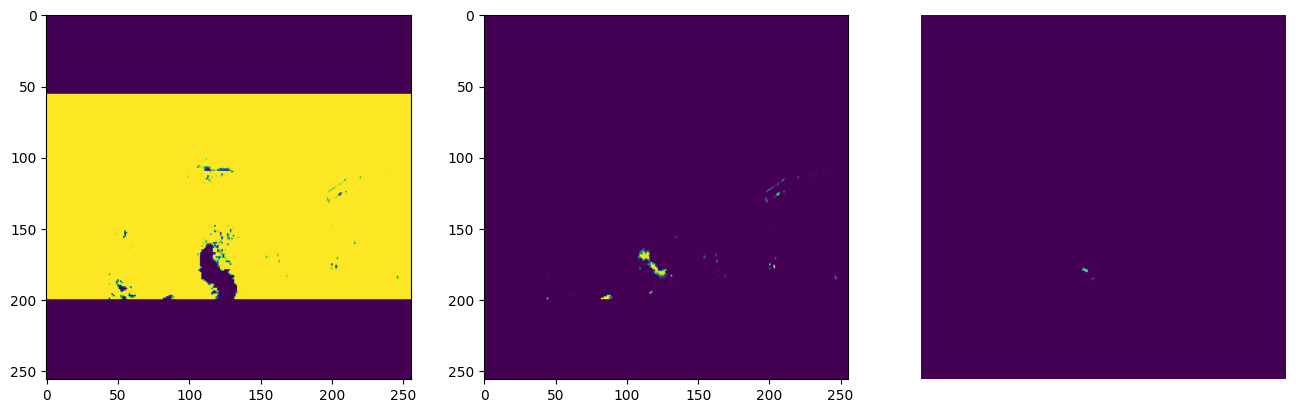

Time taken for epoch 15: 3228.38 sec

Epoch 16/100


Epoch 16/100: gen_loss: 3.9608, gen_gan_loss: 0.8158, gen_l1_loss: 0.0314, disc_loss: 0.7967: 100%|██████████| 6300/6300 [55:21<00:00,  1.90batch/s] 


Best Gen Loss: 1.886657953262329
Epoch 16/100: avg_gen_loss: 1.8908, avg_gen_gan_loss: 0.9206, avg_gen_l1_loss: 0.0097, avg_disc_loss: 1.1958


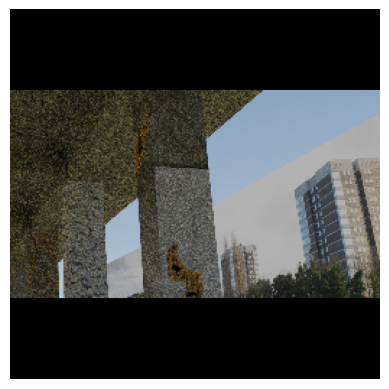

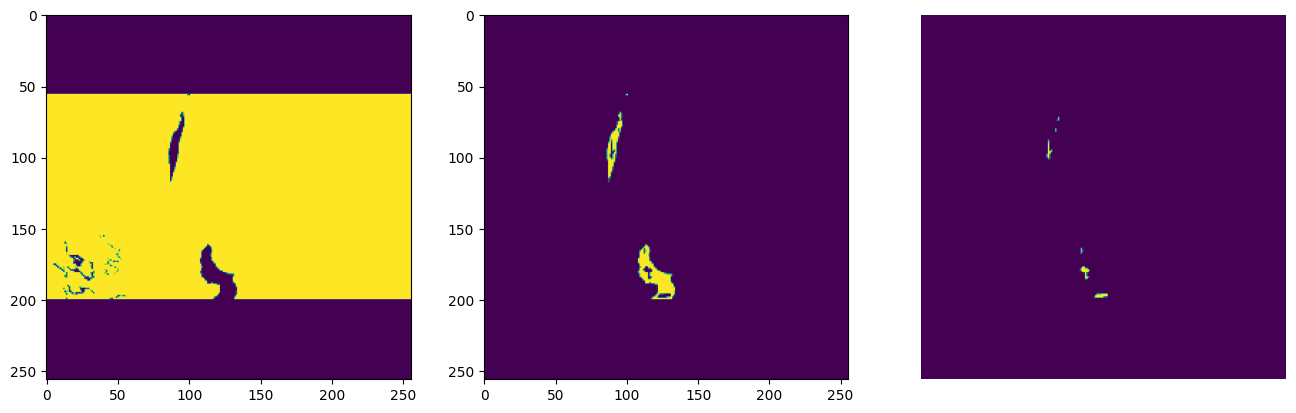

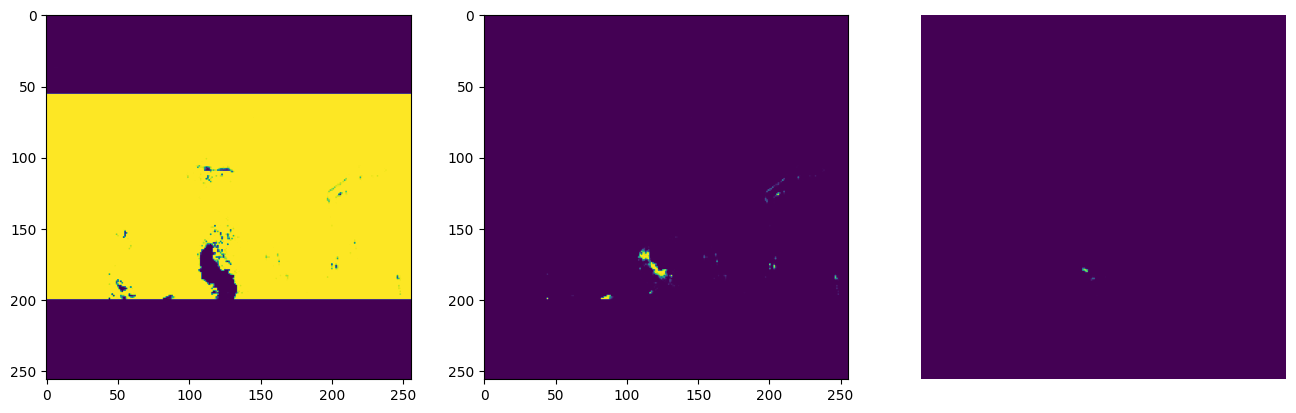

Time taken for epoch 16: 3322.59 sec

Epoch 17/100


Epoch 17/100: gen_loss: 3.9879, gen_gan_loss: 0.8445, gen_l1_loss: 0.0314, disc_loss: 0.7847: 100%|██████████| 6300/6300 [54:17<00:00,  1.93batch/s] 


Best Gen Loss: 1.886657953262329
Epoch 17/100: avg_gen_loss: 1.8826, avg_gen_gan_loss: 0.9158, avg_gen_l1_loss: 0.0097, avg_disc_loss: 1.1988
Model Saved Successfully!!


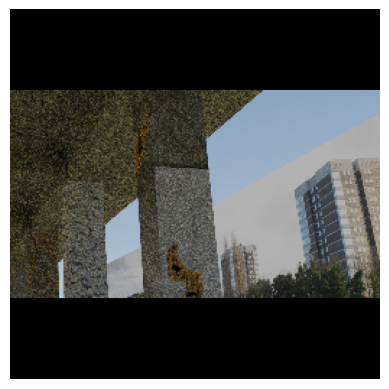

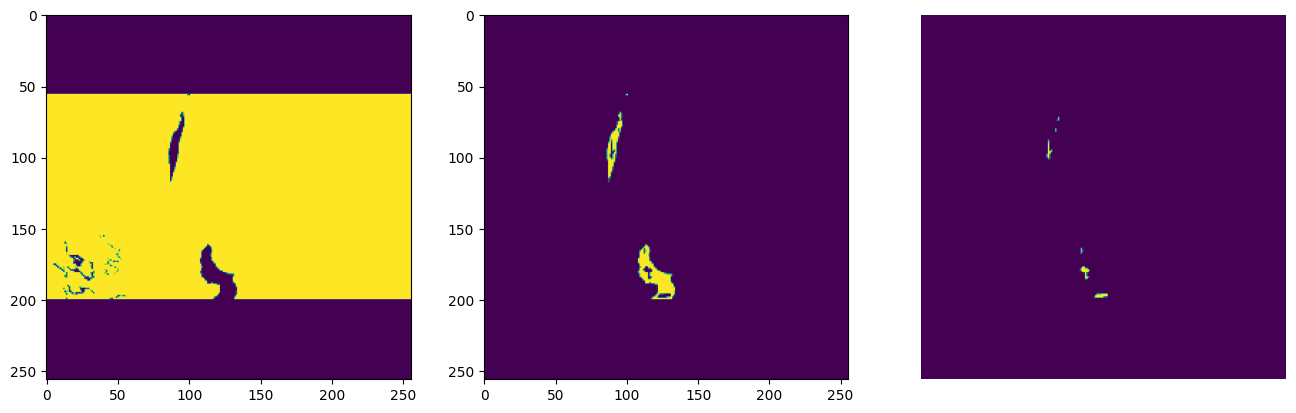

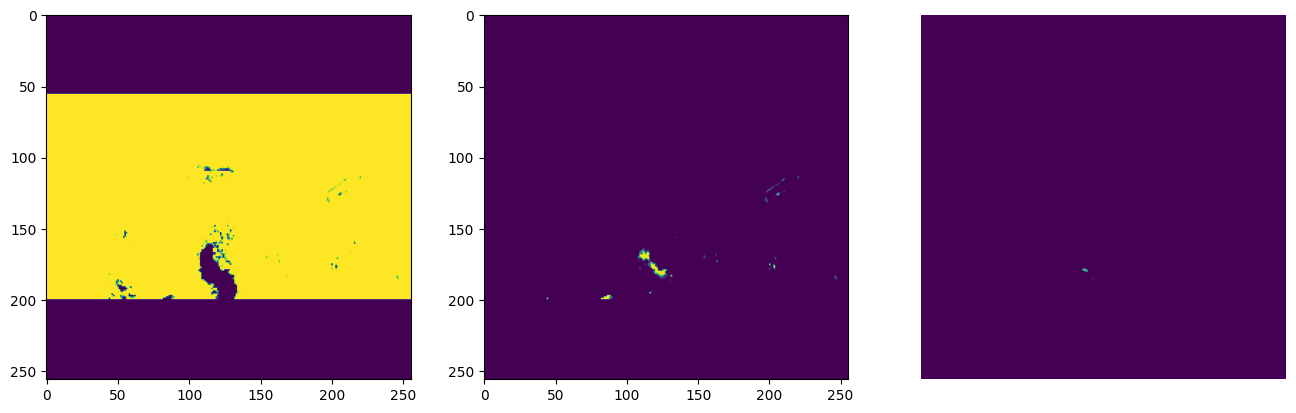

Time taken for epoch 17: 3267.11 sec

Epoch 18/100


Epoch 18/100: gen_loss: 4.0276, gen_gan_loss: 0.8820, gen_l1_loss: 0.0315, disc_loss: 0.7617: 100%|██████████| 6300/6300 [53:10<00:00,  1.97batch/s] 


Best Gen Loss: 1.8825764656066895
Epoch 18/100: avg_gen_loss: 1.8744, avg_gen_gan_loss: 0.9107, avg_gen_l1_loss: 0.0096, avg_disc_loss: 1.2022
Model Saved Successfully!!


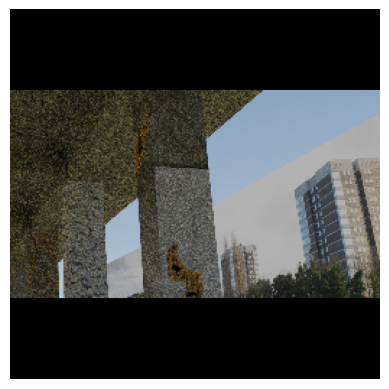

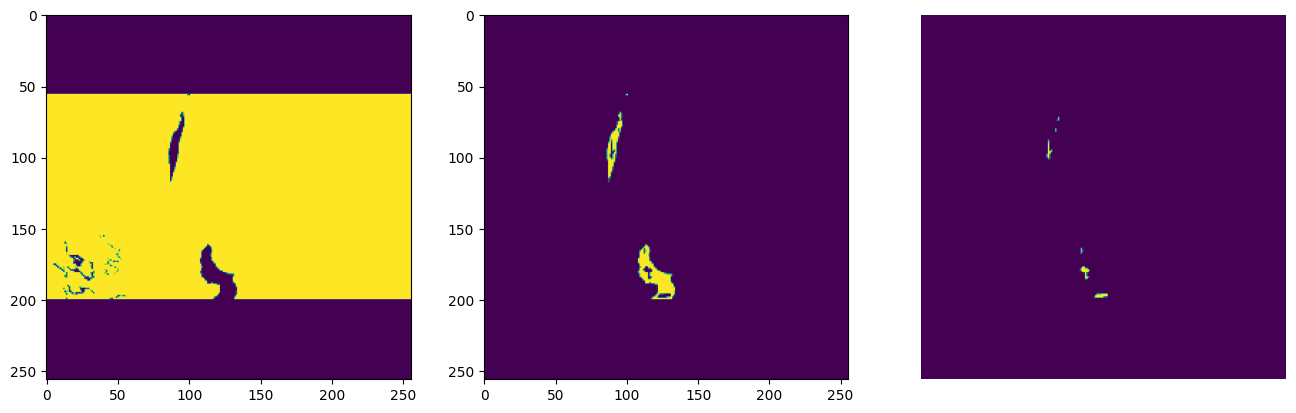

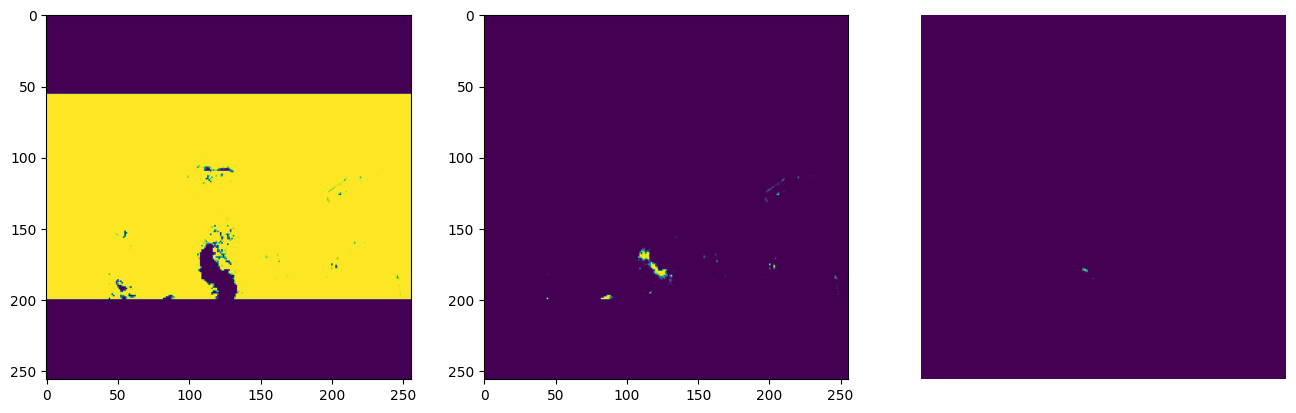

Time taken for epoch 18: 3199.56 sec

Epoch 19/100


Epoch 19/100: gen_loss: 4.1023, gen_gan_loss: 0.9450, gen_l1_loss: 0.0316, disc_loss: 0.6968: 100%|██████████| 6300/6300 [53:46<00:00,  1.95batch/s] 


Best Gen Loss: 1.8743791580200195
Epoch 19/100: avg_gen_loss: 1.8675, avg_gen_gan_loss: 0.9060, avg_gen_l1_loss: 0.0096, avg_disc_loss: 1.2050
Model Saved Successfully!!


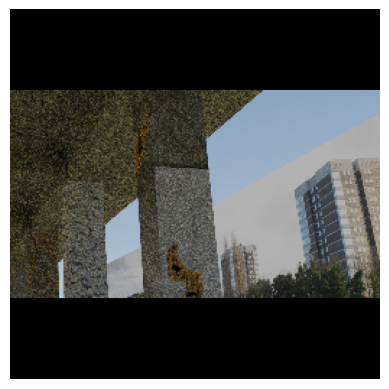

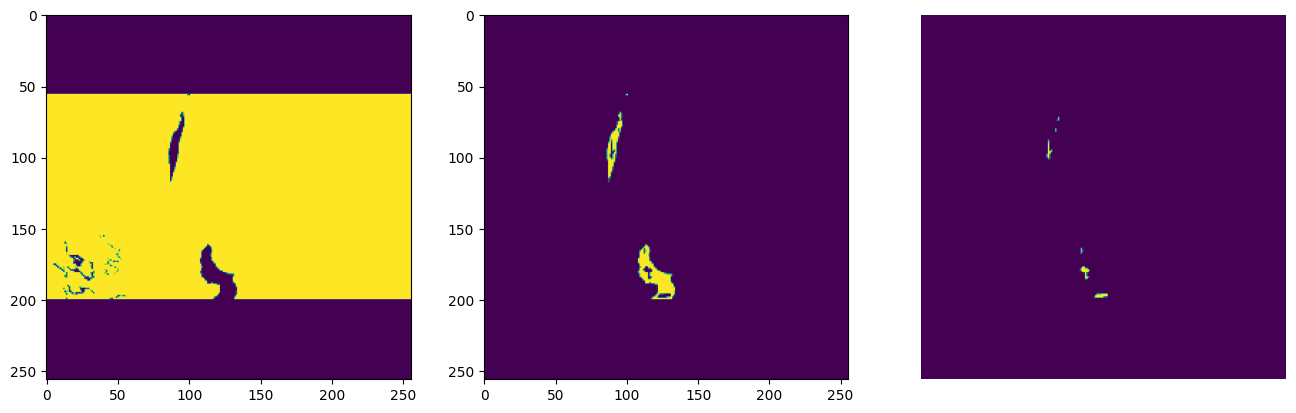

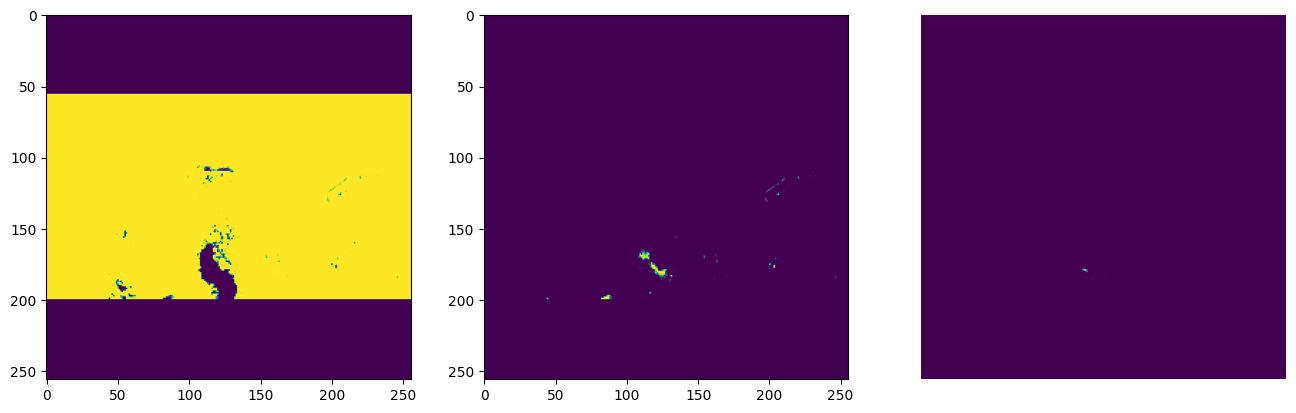

Time taken for epoch 19: 3235.90 sec

Epoch 20/100


Epoch 20/100:   0%|          | 0/6300 [00:00<?, ?batch/s]

Learning rate adjusted at epoch 20: New LR = 1.0000000116860974e-07
Learning rate adjusted at epoch 20: New LR = 9.999999974752427e-07


Epoch 20/100: gen_loss: 4.3624, gen_gan_loss: 1.1770, gen_l1_loss: 0.0319, disc_loss: 0.5426: 100%|██████████| 6300/6300 [54:28<00:00,  1.93batch/s] 


Best Gen Loss: 1.8674709796905518
Epoch 20/100: avg_gen_loss: 1.9585, avg_gen_gan_loss: 0.9608, avg_gen_l1_loss: 0.0100, avg_disc_loss: 1.1713


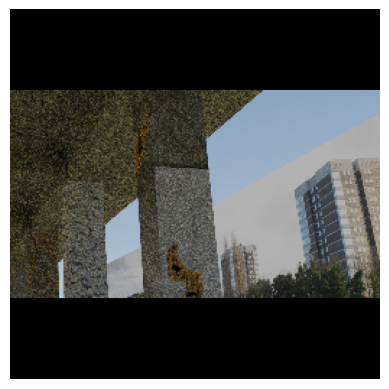

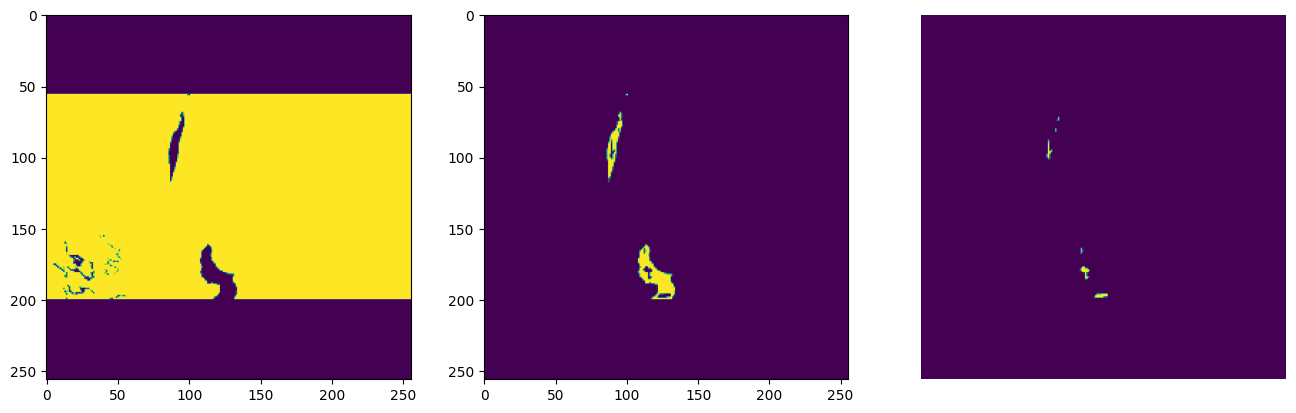

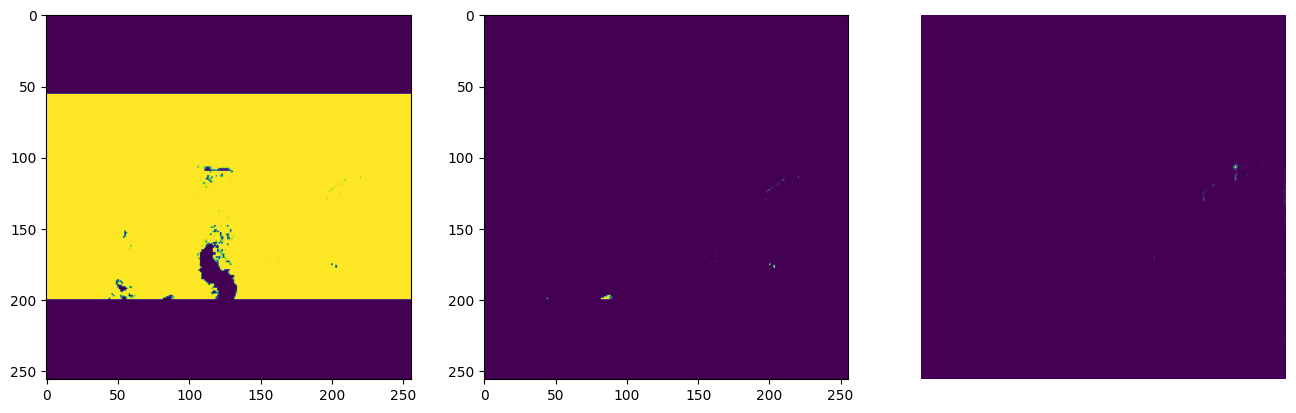

Time taken for epoch 20: 3269.02 sec

Epoch 21/100


Epoch 21/100: gen_loss: 1.5138, gen_gan_loss: 0.7840, gen_l1_loss: 0.0073, disc_loss: 1.2882:   6%|▋         | 401/6300 [03:38<53:04,  1.85batch/s]  

In [30]:
fit(train_dataset, val_dataset, 100)

In [ ]:
# Restoring the latest checkpoint in checkpoint_dir
# fit.checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
# Run the trained model on a few examples from the test set
for inp, tar in val_dataset.take(5):
  generate_images(generator, inp, tar)

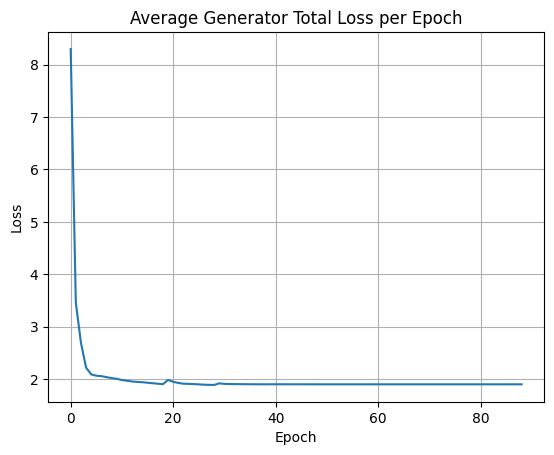

In [ ]:
losses_array = np.array(gen_total_losses)

# Plotting the losses
plt.plot(losses_array)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Generator Total Loss per Epoch')
plt.grid(True)
plt.show()

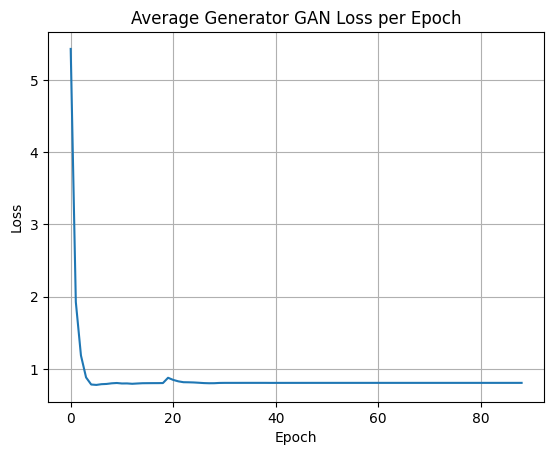

In [ ]:
losses_array = np.array(gen_gan_losses)

# Plotting the losses
plt.plot(losses_array)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Generator GAN Loss per Epoch')
plt.grid(True)
plt.show()

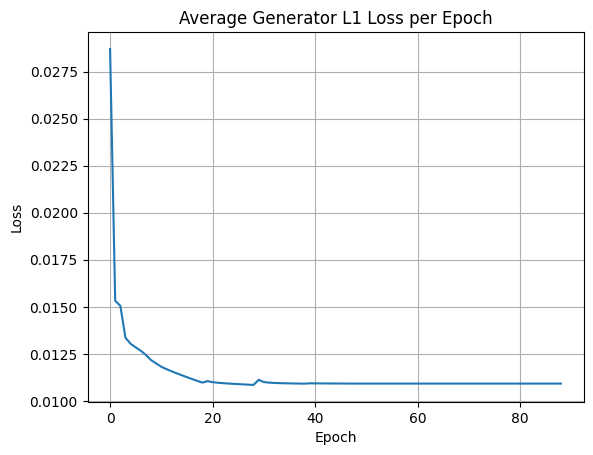

In [ ]:
losses_array = np.array(gen_l1_losses)

# Plotting the losses
plt.plot(losses_array)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Generator L1 Loss per Epoch')
plt.grid(True)
plt.show()

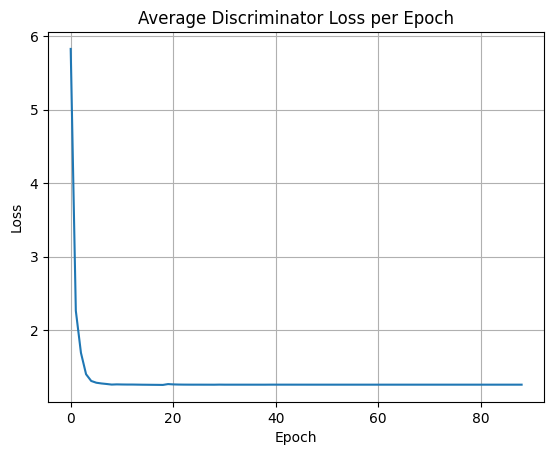

In [ ]:
losses_array = np.array(disc_losses)

# Plotting the losses
plt.plot(losses_array)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Discriminator Loss per Epoch')
plt.grid(True)
plt.show()

In [ ]:
import csv
# Combine the lists into a list of tuples
combined_losses = zip(gen_total_losses, gen_gan_losses, gen_l1_losses, disc_losses)

# Specify the file name
file_name = "losses.csv"

# Write the combined losses to a CSV file
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['gen_total_loss', 'gen_gan_loss', 'gen_l1_loss', 'disc_loss'])  # Write header
    writer.writerows(combined_losses)

print("CSV file created successfully.")